In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [3]:
file = r'data\stud.csv'
df = pd.read_csv(file)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#depandent and indepandent features
x = df.drop('math_score', axis=1)
y = df['math_score']

In [5]:
#numerical and catagorical features
num_features = x.select_dtypes(exclude='O').columns
cat_features = x.select_dtypes(include='O').columns

### Creating pipeline for encoding the data 

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [7]:
# One hot encoder for catagorical feeatures and standard scaler for numericals
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

In [8]:
#encoding and making new columns
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [9]:
X = preprocessor.fit_transform(x)

In [10]:
#splitting data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

### create an evaluation function for giving after training

In [11]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [12]:
models = {
    'Linear Regression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'K-Neighbors Regressor':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'AdaBoost Regressor':AdaBoostRegressor(),
    'XGBoost Regressor':XGBRegressor(),
    'CatBoost Regressor':CatBoostRegressor(verbose=False),
    'GradeintBoost Regressor': GradientBoostingRegressor(),
    'SVR':SVR()
}

In [13]:
model_list = []
r2_list = []

In [14]:
for i in models.keys():
    model = models[i]
    print(model)
    model.fit(X_train, y_train)
    
    #make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #evaluate train and test data
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(i)
    model_list.append(i)
    r2_list.append(model_test_r2)
    
    print('model performance for training set:')
    print(f'Root Mean Squared Error : {model_train_rmse}')
    print(f'Mean Absolute Error : {model_train_mae}')
    print(f'R2 Score : {model_train_r2}')
    print('-'*20)
    print('model performance for testing set:')
    print(f'Root Mean Squared Error : {model_test_rmse}')
    print(f'Mean Absolute Error : {model_test_mae}')
    print(f'R2 Score : {model_test_r2}')
    print('-'*20)

LinearRegression()
Linear Regression
model performance for training set:
Root Mean Squared Error : 5.316140763312842
Mean Absolute Error : 4.248271484375
R2 Score : 0.8807466908297509
--------------------
model performance for testing set:
Root Mean Squared Error : 5.38331340081429
Mean Absolute Error : 4.2642578125
R2 Score : 0.8553911432937578
--------------------
Ridge()
Ridge
model performance for training set:
Root Mean Squared Error : 5.315378186851891
Mean Absolute Error : 4.245522360745957
R2 Score : 0.8807809010766432
--------------------
model performance for testing set:
Root Mean Squared Error : 5.380121892683968
Mean Absolute Error : 4.257329877732543
R2 Score : 0.8555625557681626
--------------------
Lasso()
Lasso
model performance for training set:
Root Mean Squared Error : 6.575231142704385
Mean Absolute Error : 5.182587258102394
R2 Score : 0.8175686196307939
--------------------
model performance for testing set:
Root Mean Squared Error : 6.355413182740065
Mean Absolut

### best r2 score

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

,Model Name,R2 Score
1,Ridge,0.855563
0,Linear Regression,0.855391
9,GradeintBoost Regressor,0.835474
8,CatBoost Regressor,0.828297
5,Random Forest Regressor,0.809698
7,XGBoost Regressor,0.800513
2,Lasso,0.798450
6,AdaBoost Regressor,0.797208
10,SVR,0.794986
3,K-Neighbors Regressor,0.759515


### So We are going to take Linear regression as our model

In [16]:
regressor = LinearRegression(fit_intercept=True)
lin_model = regressor.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_pred, y_test)*100
print('Accuracy of the model %.2f'%score)

Accuracy of the model 85.25


<AxesSubplot:xlabel='math_score'>

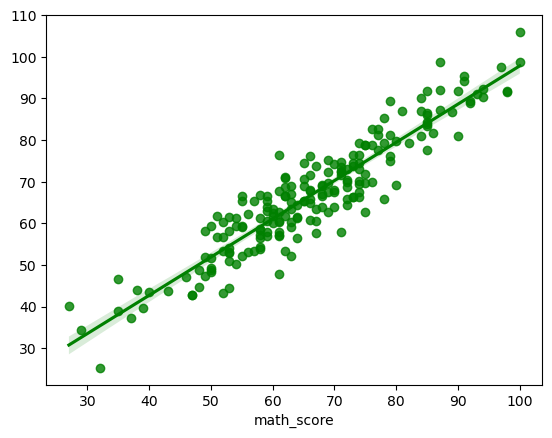

In [17]:
sns.regplot(x=y_test, y=y_pred, color='g')

In [21]:
score = {}
for model in models.keys():
    models[model].fit(X_train, y_train)
    
    #make prediction
    y_train_pred = models[model].predict(X_train)
    y_test_pred = models[model].predict(X_test)
    
    #evaluate train and test data
    model_train_r2 = r2_score(y_train, y_train_pred)
    model_test_r2 = r2_score(y_test, y_test_pred)
    
    print(model, model_test_r2)
    score[model] = model_test_r2

Linear Regression 0.8553911432937578
Ridge 0.8555625557681626
Lasso 0.798449840729279
K-Neighbors Regressor 0.7595146981259271
Decision Tree 0.6143522729937809
Random Forest Regressor 0.8126060526375869
AdaBoost Regressor 0.7942103337085842
XGBoost Regressor 0.8005131006762594
CatBoost Regressor 0.828296713382709
GradeintBoost Regressor 0.835569794140744
SVR 0.7949860684574758


In [40]:
max_score = max(score.values())
max_score

0.8555625557681626

In [43]:
best_model = [model for model in list(score.keys()) if score[model]==max_score]
best_model

['Ridge']